In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt # 데이터 시각화 도구 --> plot으로 연산.
tf.enable_eager_execution() #tensorflow를 그래프없이 연산을 가능하게함

In [45]:
x_data = [1.,2.,3.,4.,5.] # learning data
y_data = [1.,2.,3.,4.,5.] # learning data

#y_data = [6.,7.,8.,9.,10.] # real data

W = tf.Variable(2.9)
b = tf.Variable(1.0)

H = W * x_data + b
cost = tf.reduce_mean(tf.square(H - y_data)) 
#배열 = 행렬

In [44]:
W.numpy()

2.9

In [37]:
b.numpy()

1.0

In [38]:
H.numpy()

array([ 3.9     ,  6.8     ,  9.700001, 12.6     , 15.5     ],
      dtype=float32)

In [39]:
cost.numpy()

52.110004

    0|    2.4220|    0.8660| 52.110004
   10|    0.9863|    0.4526|  0.268136
   20|    0.8935|    0.4117|  0.031833
   30|    0.8907|    0.3963|  0.028760
   40|    0.8940|    0.3829|  0.026872
   50|    0.8975|    0.3702|  0.025112
   60|    0.9009|    0.3579|  0.023468
   70|    0.9042|    0.3459|  0.021931
   80|    0.9074|    0.3344|  0.020495
   90|    0.9105|    0.3233|  0.019152
  100|    0.9134|    0.3125|  0.017898


(0, 10)

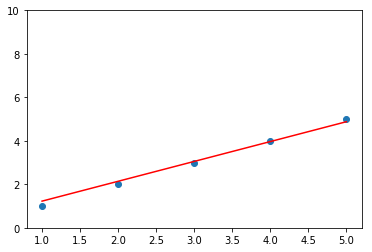

In [39]:
learning_rate = 0.01
for i in range(101):
    with tf.GradientTape() as tape: #Tape -> 실행된 연산을 테이프에 저장.
        H = W * x_data + b # tensor * ? -> tensor
        cost = tf.reduce_mean(tf.square(H - y_data))
    W_grad, b_grad = tape.gradient(cost,[W,b]) #cost식에 대해 W와 b에 대해 미분을 시행.
    W.assign_sub(learning_rate*W_grad) #gradient descent방식사용.
    b.assign_sub(learning_rate*b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
plt.plot(x_data,y_data,'o') 
#각 배열을 (x,y)으로 맵핑시켜 그래프를 만듬, 두번째 default parameter : 1부터 시작해사 tick 1씩 증가되도록 함 
plt.plot(x_data,H,'r-') # 3번째 parameter는 점 or line을 선택
plt.ylim(0,10)

    0|    2.6610|    0.9330| 52.110004
   10|    1.3865|    0.5720|  4.231172
   20|    1.0261|    0.4644|  0.371207
   30|    0.9252|    0.4288|  0.059098
   40|    0.8979|    0.4137|  0.032972
   50|    0.8915|    0.4045|  0.029927
   60|    0.8910|    0.3971|  0.028775
   70|    0.8922|    0.3902|  0.027805
   80|    0.8938|    0.3836|  0.026879
   90|    0.8955|    0.3772|  0.025984
  100|    0.8973|    0.3709|  0.025120
  110|    0.8990|    0.3646|  0.024284
  120|    0.9007|    0.3585|  0.023476
  130|    0.9024|    0.3525|  0.022695
  140|    0.9040|    0.3466|  0.021940
  150|    0.9056|    0.3408|  0.021210
  160|    0.9072|    0.3351|  0.020504
  170|    0.9087|    0.3294|  0.019822
  180|    0.9103|    0.3239|  0.019162
  190|    0.9118|    0.3185|  0.018525
  200|    0.9133|    0.3131|  0.017908
  210|    0.9147|    0.3079|  0.017312
  220|    0.9162|    0.3027|  0.016736
  230|    0.9176|    0.2976|  0.016180
  240|    0.9189|    0.2926|  0.015641
  250|    0.9203|    0.28

(0, 10)

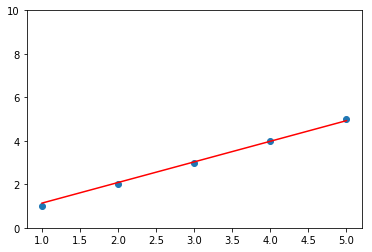

In [46]:
#tape 안쓰고

import itertools as it
learning_rate = 0.01
for i in range(101):
    H = W * x_data + b
    cost = tf.reduce_mean(tf.square(H - y_data)) #reduce_~~ -> 차원을 1 줄이면서 연산을 함
    s1 = tf.reduce_mean(tf.multiply(tf.subtract(tf.add(tf.multiply(W,x_data),b),y_data),x_data))
    s2 = tf.reduce_mean(tf.add(tf.subtract(tf.multiply(W,x_data),y_data),b)) # error generate
    W_grad = learning_rate * s1 
    b_grad = learning_rate * s2 
    W.assign_sub(W_grad) #gradient descent방식사용.
    b.assign_sub(b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
plt.plot(x_data,y_data,'o') 
#각 배열을 (x,y)으로 맵핑시켜 그래프를 만듬, 두번째 default parameter : 1부터 시작해사 tick 1씩 증가되도록 함 
plt.plot(x_data,H,'r-') # 3번째 parameter는 점 or line을 선택
plt.ylim(0,10)